In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
haar_path = os.path.join('..', 'models', 'haarcascade_frontalface_default.xml')
cascade = cv2.CascadeClassifier(haar_path)

cap = cv2.VideoCapture(0)


def detect_face(frame, cascade):
    frame_g = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face = cascade.detectMultiScale(frame_g, 1.3, 5)
    if len(face) == 0:
        return frame, None, None
    
    x, y, w, h = face[0]
    
    frame = cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
    face_img = frame[y: y+h, x: x+w]
    
    return frame, face_img, face

img = cv2.imread('example_face.jpg')
frame, face, _ = detect_face(img, cascade)
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

In [3]:
i = 1

while True:
    _, frame = cap.read()
    frame, face_img, _ = detect_face(frame, cascade)
    cv2.imshow('Output', frame)
    
    k = cv2.waitKey(1)
    if k == 27:
        break
    elif k == ord('s'):
        cv2.imshow('Photo', face_img)
        face_path = os.path.join('faces', f'img_{i}.jpg')
        face_img = cv2.resize(face_img, (480, 480))
        i += 1
        cv2.imwrite(face_path, face_img)
        
cap.release()
cv2.destroyAllWindows()

In [4]:
faces = []

for file in os.listdir('faces'):
    file_path = os.path.join('faces', file)
    if os.path.isfile(file_path):
        face_img = cv2.imread(file_path, 0)
        faces.append(face_img)
        
faces = np.array(faces)
labels = np.arange(len(faces))

model = cv2.face.LBPHFaceRecognizer_create()

model.train(faces, labels)

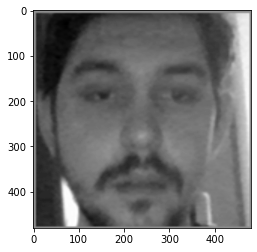

In [5]:
example = cv2.imread('faces/img_1.jpg')
example = cv2.cvtColor(example, cv2.COLOR_BGR2GRAY)
plt.imshow(example, cmap='gray')

In [6]:
model.predict(example)

(0, 0.3532253556875455)

In [7]:
cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read() 
    frame, face_img, face_coords = detect_face(frame, cascade)
    
    try:
        face_img = cv2.resize(face_img, (480, 480))
        face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)
        label, conf = model.predict(face_img)
        
        conf = int(100 * (1- conf / 400))
        conf_str = f'Probability of user: {conf}%'
        
        frame = cv2.putText(frame, str(conf_str), (10, 15), 
                            cv2.FONT_HERSHEY_COMPLEX, 0.5, (0,255,0), 2)
        
        x, y, _, _ = face_coords[0]
        
        title = 'Unknown'
        if conf > 80:
            title = 'Bartek'
        
        frame = cv2.putText(frame, title, (x, y - 5),
                            cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 255, 0), 2)
        
    except:
        pass
    
    cv2.imshow('Detector', frame)
    
    k = cv2.waitKey(1)
    if k == 27:
        break
        
cap.release()
cv2.destroyAllWindows()